In [1]:
import torchvision
from torchvision.utils import make_grid
from torchvision import datasets, transforms
from src.model import MLModel
from src.trainer import Trainer
from src.dataloader import Loader
from src.utils.utils import plot_history, load_model, load_history
from matplotlib import pyplot as plt

In [2]:
training_dir='cifar10-dataset'

In [3]:
# Define data augmentation
def _get_transforms():
    transform = transforms.Compose([
        transforms.RandomCrop(32, padding=4),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ])
    return transform

In [4]:
train_set = torchvision.datasets.CIFAR10(root=training_dir,
                                         train=True,
                                         download=False,
                                         transform=_get_transforms())

In [5]:
val_set = torchvision.datasets.CIFAR10(root=training_dir,
                                        train=False,
                                        download=False,
                                        transform=_get_transforms())

In [6]:
val_set.data.shape

(10000, 32, 32, 3)

In [7]:
datasets = (train_set, val_set)

In [8]:
model = MLModel()

In [9]:
config = {
    'seed': 32,
    'scheduler': None,
    'optimizer': 'sgd',
    'momentum': 0.9,
    'weight_decay': 0.0,
    'lr': 0.001,
    'criterion': 'cross_entropy',
    'metric': 'accuracy',
    'pred_function': 'softmax',
    'model_dir': 'model_output',
    'backend': 'smddp'
}

In [10]:
trainer = Trainer(model, datasets=datasets, epochs=6, batch_size=32, **config)

2023-02-03 15:21.11 [info     ] Config inputs.                 config={'seed': 32, 'scheduler': None, 'optimizer': 'sgd', 'momentum': 0.9, 'weight_decay': 0.0, 'lr': 0.001, 'criterion': 'cross_entropy', 'metric': 'accuracy', 'pred_function': 'softmax', 'model_dir': 'model_output', 'back_end': 'smddp'}
2023-02-03 15:21.11 [info     ] Loading the model.
2023-02-03 15:21.11 [info     ] Training on device: cpu.
2023-02-03 15:21.11 [info     ] Loading training and validation set.
2023-02-03 15:21.11 [info     ] Preparing the data.
2023-02-03 15:21.11 [debug    ] Processes 50000/50000 (100%) of train data
2023-02-03 15:21.11 [debug    ] Processes 10000/10000 (100%) of validation data


In [11]:
classes = train_set.classes
class_count = {}
for _, index in train_set:
    label = classes[index]
    if label not in class_count:
        class_count[label] = 0
    class_count[label] += 1
class_count

{'frog': 5000,
 'truck': 5000,
 'deer': 5000,
 'automobile': 5000,
 'bird': 5000,
 'horse': 5000,
 'ship': 5000,
 'cat': 5000,
 'dog': 5000,
 'airplane': 5000}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


images.shape: torch.Size([32, 3, 32, 32])


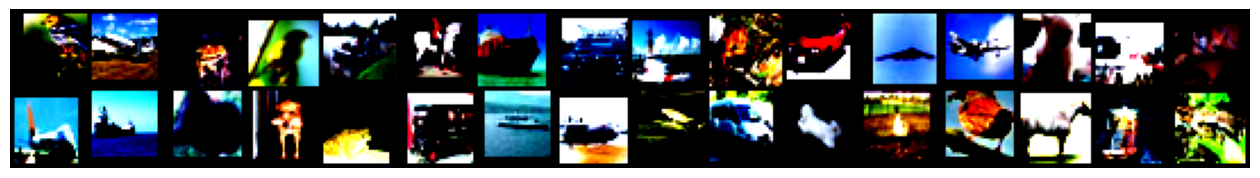

In [12]:
for images, _ in trainer.train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

In [13]:
trainer.fit()

2023-02-03 15:21.20 [info     ] Start training..
2023-02-03 15:21.20 [info     ] ------------------------------ EPOCH 1 / 6 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 53.86batch/s, loss=1.83, metric=0.333]  


2023-02-03 15:22.17 [info     ] Saving the model.
2023-02-03 15:22.17 [info     ] train loss: 2.0736612690921326 - train accuracy: 0.22816698656429943
2023-02-03 15:22.17 [info     ] valid loss: 1.826220686824177 - valid accuracy: 0.3334664536741214


2023-02-03 15:22.17 [info     ] ------------------------------ EPOCH 2 / 6 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 54.87batch/s, loss=1.67, metric=0.385]  


2023-02-03 15:23.24 [info     ] Saving the model.
2023-02-03 15:23.24 [info     ] train loss: 1.728706102758665 - train accuracy: 0.3641634676903391
2023-02-03 15:23.24 [info     ] valid loss: 1.67315438799203 - valid accuracy: 0.38488418530351437


2023-02-03 15:23.24 [info     ] ------------------------------ EPOCH 3 / 6 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 53.83batch/s, loss=1.55, metric=0.435]  


2023-02-03 15:24.27 [info     ] Saving the model.
2023-02-03 15:24.27 [info     ] train loss: 1.6051787817546823 - train accuracy: 0.41264795265515036
2023-02-03 15:24.27 [info     ] valid loss: 1.5534737418634823 - valid accuracy: 0.4347044728434505


2023-02-03 15:24.27 [info     ] ------------------------------ EPOCH 4 / 6 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 55.07batch/s, loss=1.47, metric=0.47]   


2023-02-03 15:25.26 [info     ] Saving the model.
2023-02-03 15:25.26 [info     ] train loss: 1.510349299575149 - train accuracy: 0.44795665387076133
2023-02-03 15:25.26 [info     ] valid loss: 1.4695023888597092 - valid accuracy: 0.4703474440894569


2023-02-03 15:25.26 [info     ] ------------------------------ EPOCH 5 / 6 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 53.54batch/s, loss=1.41, metric=0.493]  


2023-02-03 15:26.33 [info     ] Saving the model.
2023-02-03 15:26.33 [info     ] train loss: 1.4396457404413059 - train accuracy: 0.4764675303902751
2023-02-03 15:26.33 [info     ] valid loss: 1.4093079148009182 - valid accuracy: 0.4930111821086262


2023-02-03 15:26.33 [info     ] ------------------------------ EPOCH 6 / 6 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 59.69batch/s, loss=1.34, metric=0.521]  


2023-02-03 15:27.32 [info     ] Saving the model.
2023-02-03 15:27.32 [info     ] train loss: 1.3794238612351324 - train accuracy: 0.5028390914907229
2023-02-03 15:27.32 [info     ] valid loss: 1.3414625432163763 - valid accuracy: 0.5207667731629393


2023-02-03 15:27.32 [info     ] Training Complete.


In [14]:
trainer.save_history_('model_output')

2023-02-03 15:27.32 [info     ] Saving the training history.


In [19]:
history = load_history('model_output')

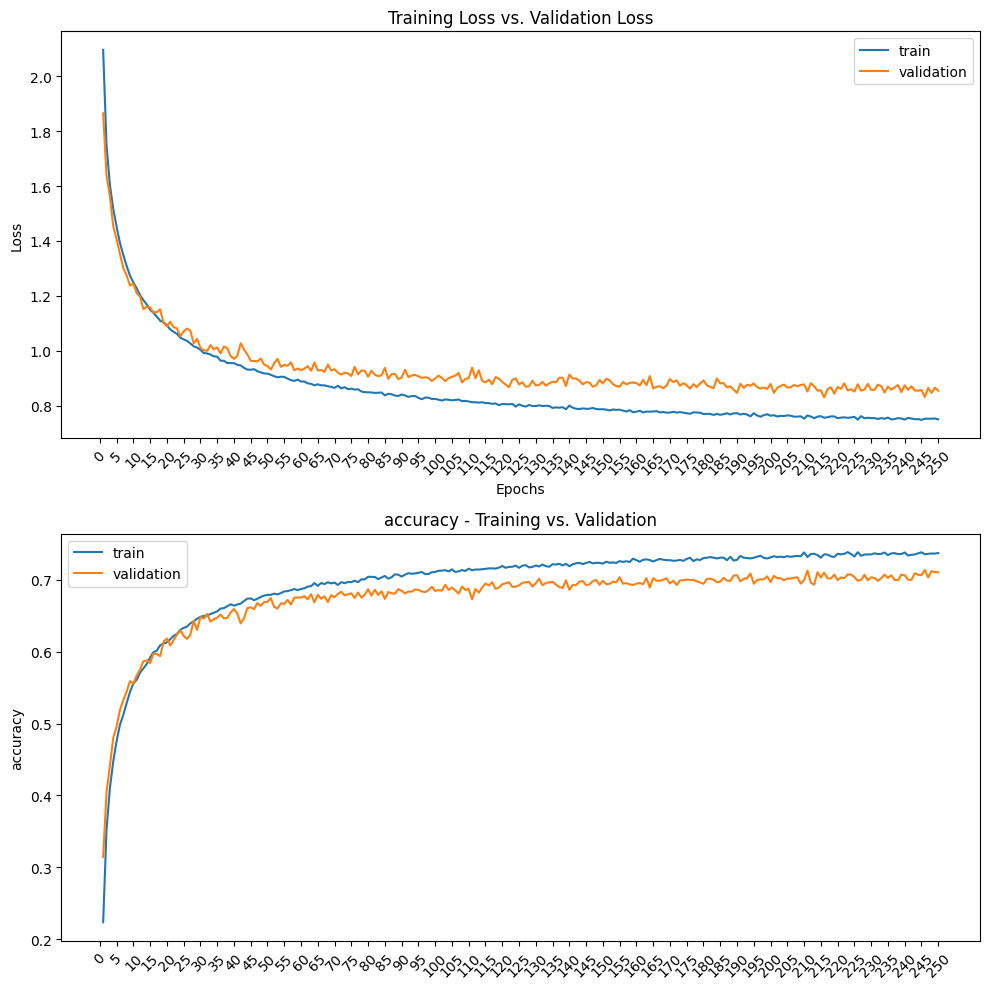

In [20]:
plot_history(history)

In [21]:
model = MLModel()
model = load_model(model, 'model_output/model.pth')
test_loss, test_accuracy = trainer.test(model, trainer.val_loader)

2023-02-03 15:28.56 [info     ] Testing..


100%|██████████| 313/313 [00:06<00:00, 51.58batch/s, loss=0.857, metric=0.708] 


In [22]:
print(f'Model accuracy on test: {test_accuracy}')

Model accuracy on test: 0.7079672523961661
